# Laden

In [1]:


#  CSV erkennen by David Maksimovic 24.06.2019
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
#import keras

#from keras import regularizers
from tensorflow import keras
from tensorflow.keras import regularizers, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LeakyReLU, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping
import time
import pickle
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import pydot_ng as pydot
import numpy as np
import glob
import os
import random



########### Normalisieren ###########

#Ist schon normalisiert
########### Normalisieren ###########

#Ist schon normalisiert

In [2]:

########### Daten laden ###########
X= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/X_Beamlike_PID_gn_PMT160andLAPPD1x1_120k_Files_mitTopBottom.pickle","rb"))
Y= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/Y_Beamlike_PID_gn_PMT160andLAPPD1x1_120k_Files_mitTopBottom.pickle","rb"))
XMRD = np.load("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/Temp/MRD.npy")


In [3]:
unique, counts = np.unique(Y, return_counts=True, axis=0)
print(counts)
print(unique)
print(100/(counts[0]+counts[1])*counts[1])



[59977 60028]
[[0 1]
 [1 0]]
50.021249114620225


In [74]:
XMRD[:,0]

1.0

mrdeventcounter, num_mrd_paddles, num_mrd_layers, num_mrd_conslayers, num_mrd_adjacent,mrd_padperlayer

In [132]:
unique, counts = np.unique(XMRD[:59977 ,0], return_counts=True, axis=0)
print("Mrd Cluster Counter How do they look like: ",unique)
print("Mrd Cluster Counter (4 Hits innerhalb von 30 ns): ",counts)
print( "\n \n ")
unique, counts = np.unique(XMRD[59977: ,0], return_counts=True, axis=0)
print("Mrd Cluster Counter How do they look like: ",unique)
print("Mrd Cluster Counter (4 Hits innerhalb von 30 ns): ",counts)
print( "\n \n ")
#print(100/(counts[0]+counts[1])*counts[1])
unique, counts = np.unique(XMRD[:59977 ,1], return_counts=True, axis=0)
print("number of mrd-paddles Hit: How do they look like: \n ",unique)
print("num_mrd_paddles: \n" ,counts)
print( "\n \n ")
#print(100/(counts[0]+counts[1])*counts[1])
unique, counts = np.unique(XMRD[:59977 ,2], return_counts=True, axis=0)
print("number of mrd-layers", unique)
print("num_mrd_layers",counts)
print( "\n \n ")
#print(100/(counts[0]+counts[1])*counts[1])
unique, counts = np.unique(XMRD[:59977 ,3], return_counts=True, axis=0)
print("number of mrd-consecutive layers",unique)
print("num_mrd_conslayers",counts)
print( "\n \n ")
#print(100/(counts[0]+counts[1])*counts[1])
unique, counts = np.unique(XMRD[:59977 ,4], return_counts=True, axis=0)
print("number of adjacent events",unique)
print("num_mrd_adjacent",counts)
print( "\n \n ")
#print(100/(counts[0]+counts[1])*counts[1])
unique, counts = np.unique(XMRD[:59977 ,5], return_counts=True, axis=0)
print("mrd_padperlayer","\n",unique)
print("mrd_padperlayer","\n",counts)
print( "\n \n ")
#print(100/(counts[0]+counts[1])*counts[1])

#120.005 
#60.000 #12 % Der Fälle
#In 5 Prozten der Fälle 

#In 10 Prozen der Fälle  

Mrd Cluster Counter How do they look like:  [0. 1. 2.]
Mrd Cluster Counter (4 Hits innerhalb von 30 ns):  [56354  3621     2]

 
 
Mrd Cluster Counter How do they look like:  [0. 1. 2.]
Mrd Cluster Counter (4 Hits innerhalb von 30 ns):  [54110  5912     6]

 
 
number of mrd-paddles Hit: How do they look like: 
  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 23. 24.]
num_mrd_paddles: 
 [46805   323  1042  1876  2388  2243  1862  1305   902   547   297   183
   106    41    27    14     5     5     2     2     1     1]

 
 
number of mrd-layers [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
num_mrd_layers [46810   609  2109  3374  3351  2331   972   342    67    11     1]

 
 
number of mrd-consecutive layers [0. 1. 2. 3. 4. 5. 6. 7.]
num_mrd_conslayers [48541  5840  3352  1450   554   176    56     8]

 
 
number of adjacent events [0. 1. 2. 3.]
num_mrd_adjacent [59216   721    37     3]

 
 
mrd_padperlayer 
 [0.      1.      1.11111 ...     nan     

In [ ]:
unique, counts = np.unique(NMRD[:,0], return_counts=True, axis=0)
print("Mrd Cluster Counter How do they look like: ",unique)
print("Mrd Cluster Counter (4 Hits innerhalb von 30 ns): ",counts)
print( "\n \n ")
#print(100/(counts[0]+counts[1])*counts[1])
unique, counts = np.unique(XMRD[:,1], return_counts=True, axis=0)
print("number of mrd-paddles Hit: How do they look like: \n ",unique)
print("num_mrd_paddles: \n" ,counts)
print( "\n \n ")
#print(100/(counts[0]+counts[1])*counts[1])
unique, counts = np.unique(XMRD[:,2], return_counts=True, axis=0)
print("number of mrd-layers", unique)
print("num_mrd_layers",counts)
print( "\n \n ")
#print(100/(counts[0]+counts[1])*counts[1])
unique, counts = np.unique(XMRD[:,3], return_counts=True, axis=0)
print("number of mrd-consecutive layers",unique)
print("num_mrd_conslayers",counts)
print( "\n \n ")
#print(100/(counts[0]+counts[1])*counts[1])
unique, counts = np.unique(XMRD[:,4], return_counts=True, axis=0)
print("number of adjacent events",unique)
print("num_mrd_adjacent",counts)
print( "\n \n ")
#print(100/(counts[0]+counts[1])*counts[1])
unique, counts = np.unique(XMRD[:,5], return_counts=True, axis=0)
print("mrd_padperlayer","\n",unique)
print("mrd_padperlayer","\n",counts)
print( "\n \n ")
#print(100/(counts[0]+counts[1])*counts[1])

120.005 
60.000 #12 % Der Fälle

In [4]:
XMRD.shape,X.shape

((120005, 6), (120005, 10, 24, 2))

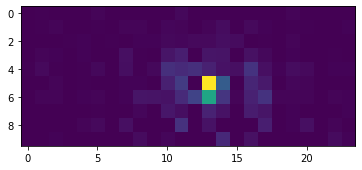

In [5]:
plt.imshow(X[7,:,:,0], cmap='viridis', interpolation='None')

## 120 k files

In [7]:
training_data = list(zip(X, Y,XMRD))
import random
random.shuffle(training_data)

for sample in Y[:5]:
    print("Eintrag \n", sample)

X1 =[]
Y1 =[]
XMRD1=[]

for x in training_data[:85000]:
    
    X1.append(x[0])
    Y1.append(x[1])
    XMRD1.append(x[2])
    
XTraining = np.array(X1)
YTraining = np.array(Y1)
XMRDTraing= np.array(XMRD1)

X2 =[]
Y2 =[]
XMRD2=[]

for x in training_data[85000:105000]:
    
    X2.append(x[0])
    Y2.append(x[1])
    XMRD2.append(x[2])
    
    
XVal = np.array(X2)
YVal = np.array(Y2)
XMRDVal=np.array(XMRD2)

X3 =[]
Y3 =[]
XMRD3=[]

for x in training_data[105000:]:
    
    X3.append(x[0])
    Y3.append(x[1])
    XMRD3.append(x[2])
    
XTest = np.array(X3)
YTest = np.array(Y3)
XMRDTest=np.array(XMRD3)

print(XTraining.shape,XVal.shape,XTest.shape)
del X,Y,X1,X2,X3,Y1,Y2,Y3,XMRD3,XMRD2,XMRD1

Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
(85000, 10, 24, 2) (20000, 10, 24, 2) (15005, 10, 24, 2)


In [9]:
XMRDTraing.shape,XMRDVal.shape,XMRDTest.shape

((85000, 6), (20000, 6), (15005, 6))

In [3]:
####### MRD Cluster Set#######

counter=0
NewXTraining=[]
NewYTraining=[]
NewMRDTraining=[]
NewXVal=[]
NewYVal=[]
NewMRDVal=[]
NewXTest=[]
NewYTest=[]
NewMRDTest=[]

for x in XMRDTraing:
    if x[0]>=1:
        NewXTraining.append(XTraining[counter])
        NewYTraining.append(YTraining[counter])
        NewMRDTraining.append(XMRDTraing[counter])
    counter=counter+1
counter=0
for x in XMRDVal:
    if x[0]>=1:
        NewXVal.append(XVal[counter])
        NewYVal.append(YVal[counter])
        NewMRDVal.append(XMRDVal[counter])
    counter=counter+1
for x in XMRDTest:
    if x[0]>=1:
        NewXVTest.append(XTest[counter])
        NewYTest.append(YTest[counter])
        NewMRDTest.append(XMRDTest[counter])
    counter=counter+1
    
NewYVal = np.array(NewYVal)
NewYTraining = np.array(NewYTraining)
NewYTest=np.array(NewYTest)
NewXVal= np.array(NewXVal)
NewXTraining=np.array(NewXTraining)
NewXTest=np.array(NewXTest)
NewMRDTraining=np.array(NewMRDTraining)
NewMRDVal=np.array(NewMRDVal)
NewMRDTest=np.array(NewMRDTest)

NameError: name 'XMRDTraing' is not defined

In [4]:
XMRDTraing

NameError: name 'XMRDTraing' is not defined

# Testen der besten Methode

In [5]:
XTraining.shape[1:]

NameError: name 'XTraining' is not defined

In [128]:
# dense_layers = [3]
# layer_sizes = [160]
# conv_layers = [3]
# kernal_size = [(3,3)]
#Ist schon normalisiert

#NAME ="BigData_Beamlike-32k-toy_res"

#tensorboard = TensorBoard(log_dir = 'logs\{}'.format(NAME))


inputDet = tf.keras.Input(shape=XTraining.shape[1:], name='PMT')
inputMRD = tf.keras.Input(shape=(5), name='MRD')


x = layers.Conv2D(160, kernel_size=(3,3),activation ='relu',padding='same')(inputDet)
x = layers.MaxPooling2D(2,padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)

x = layers.Conv2D(160, kernel_size=(3,3),activation ='relu',padding='same')(x)
x = layers.MaxPooling2D(2,padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)

x = layers.Conv2D(160, kernel_size=(3,3),activation ='relu',padding='same')(x)
x = layers.MaxPooling2D(2,padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)

#xP = layers.GlobalAveragePooling2D()(x)
x = layers.Flatten()(x)

x = layers.Dense(512, activation='sigmoid')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(492, activation='sigmoid')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(32, activation='sigmoid')(x)
x = layers.BatchNormalization()(x)
xP = layers.Dropout(0.2)(x)


mrd = layers.Dense(6, activation='sigmoid')(inputMRD)
#mrd =layers.Flatten()(mrd)


x = layers.concatenate([xP, mrd]) #38
#x = layers.Dropout(0.5)(x)
x= layers.Dense(100, activation='sigmoid')(x)
x= layers.BatchNormalization()(x)

x= layers.Dense(100, activation='sigmoid')(x)
x= layers.BatchNormalization()(x)


outputs = layers.Dense(2, activation='softmax')(x)



model = tf.keras.Model(inputs=[inputDet, inputMRD], outputs=[outputs], name='Model')

model.summary()




Model: "Model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
PMT (InputLayer)                [(None, 10, 24, 2)]  0                                            
__________________________________________________________________________________________________
conv2d_79 (Conv2D)              (None, 10, 24, 160)  3040        PMT[0][0]                        
__________________________________________________________________________________________________
max_pooling2d_79 (MaxPooling2D) (None, 5, 12, 160)   0           conv2d_79[0][0]                  
__________________________________________________________________________________________________
batch_normalization_189 (BatchN (None, 5, 12, 160)   640         max_pooling2d_79[0][0]           
______________________________________________________________________________________________

In [129]:


#Model compile
model.compile(
            optimizer='adam',
            #optimizer = keras.optimizers.RMSprop(1e-3),
            loss='categorical_crossentropy',
            metrics=['acc'])


#filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
filepath="PMTOnly_RingCounting-improvement-val-acc_{val_acc:.2f}.model" 
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)


#model Fit


In [ ]:
XMRDTraing

Train on 85000 samples, validate on 20000 samples
Epoch 1/30
85000/85000 [==============================] - 21s 246us/sample - loss: 0.3394 - acc: 0.8517 - val_loss: 0.2362 - val_acc: 0.9029
Epoch 2/30
85000/85000 [==============================] - 17s 196us/sample - loss: 0.2444 - acc: 0.8999 - val_loss: 0.1987 - val_acc: 0.9193
Epoch 3/30
85000/85000 [==============================] - 17s 197us/sample - loss: 0.2142 - acc: 0.9118 - val_loss: 0.2446 - val_acc: 0.9002
Epoch 4/30
85000/85000 [==============================] - 17s 199us/sample - loss: 0.1971 - acc: 0.9187 - val_loss: 0.2595 - val_acc: 0.8985
Epoch 5/30
85000/85000 [==============================] - 17s 199us/sample - loss: 0.1882 - acc: 0.9239 - val_loss: 0.1896 - val_acc: 0.9220
Epoch 6/30
85000/85000 [==============================] - 17s 200us/sample - loss: 0.1766 - acc: 0.9284 - val_loss: 0.1763 - val_acc: 0.9299
Epoch 7/30
85000/85000 [==============================] - 17s 205us/sample - loss: 0.1662 - acc: 0.9333 

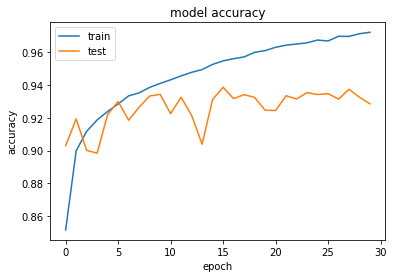

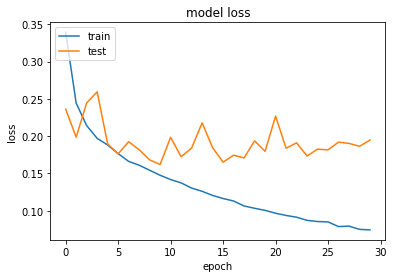

Ende des Versuchs: 


In [130]:

history = model.fit([XTraining,XMRDTraing[:,:5]],
                    YTraining,
                    batch_size=100,
                    #validation_split=0.2,
                    
                    validation_data=([XVal,XMRDVal[:,:5]],YVal),
                    epochs= 30,
                    
                    shuffle=True,
                    class_weight='balanced',
                    callbacks=[
                                #monitor,
                                #checkpoint,
                                #tensorboard 
                    ],
                    verbose=1)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("Ende des Versuchs: ")

# Test with just Cluster approvements

In [104]:
NewYVal = np.array(NewYVal)
NewYVal.shape
NewYTraining = np.array(NewYTraining )
NewYTraining .shape
NewXVal= np.array(NewXVal)
NewXTraining=np.array(NewXTraining)
NewMRDTraining=np.array(NewMRDTraining)
NewMRDVal=np.array(NewMRDVal)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_76 (Conv2D)           (None, 10, 24, 160)       3040      
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 5, 12, 160)        0         
_________________________________________________________________
batch_normalization_183 (Bat (None, 5, 12, 160)        640       
_________________________________________________________________
dropout_177 (Dropout)        (None, 5, 12, 160)        0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 5, 12, 160)        230560    
_________________________________________________________________
max_pooling2d_77 (MaxPooling (None, 3, 6, 160)         0         
_________________________________________________________________
batch_normalization_184 (Bat (None, 3, 6, 160)       

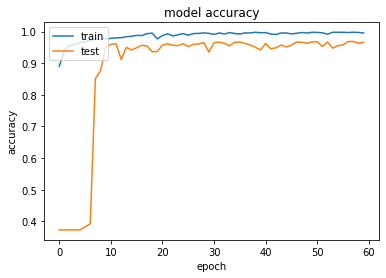

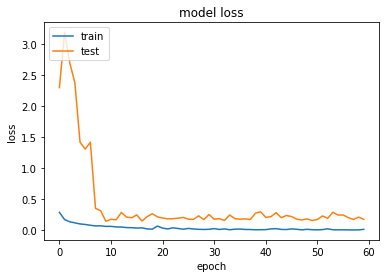

Ende des Versuchs: 


In [127]:
dense_layers = [3]
layer_sizes = [160]
conv_layers = [3]
kernal_size = [(3,3)]
for filter_size in kernal_size:
    for dense_layer in dense_layers:
        for layer_size in layer_sizes:
            for conv_layer in conv_layers:

                NAME ="PMT-MuEl-{}-filter_size-{}-conv-{}-nodes-{}-dense".format(filter_size,conv_layer, layer_size, dense_layer) #,int(time.time())
                tensorboard = TensorBoard(log_dir = 'logs\PMTplusLAPPD_CNN\{}'.format(NAME))


                model = Sequential()
                model.add(Conv2D(layer_size,filter_size,strides=1, input_shape= NewXTraining.shape[1:],activation="relu", padding='same'))                                               
                model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                for l in range(conv_layer-1):                   
                    model.add(Conv2D(layer_size,filter_size,padding='same',activation="relu"))              
                    model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))            
                #model.add(GlobalAveragePooling2D())
                model.add(Flatten())
                for l in range(dense_layer-1):
                    model.add(Dense(512-l*20 ,activation="relu" ))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))
                model.add(Dense(32,activation="relu"))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                model.add(Dense(2))
                model.add(Activation('softmax'))
                #adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, epsilon = 0.001)
                model.compile(loss="binary_crossentropy",
                             optimizer="adam",
                              metrics=['accuracy']
                             )   
                filepath="CNN_PMT+LAPPD(1x1)_PID_120k_V3-improvement-val-acc_{val_acc:.2f}.model"  
                checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
                #monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
                model.summary()
                history=model.fit(
                    
                    NewXTraining,NewYTraining,
              #validation_data=(XVal,Yval)
                 validation_data=(NewXVal,NewYVal)   
                    
              ,batch_size=100,
                shuffle=True,
                class_weight='balanced',
                callbacks=[
                            #monitor,
                            #checkpoint,
                            #tensorboard 
                ],
              epochs= 60)
                print(history.history.keys())
                # summarize history for accuracy
                plt.plot(history.history['acc'])
                plt.plot(history.history['val_acc'])
                plt.title('model accuracy')
                plt.ylabel('accuracy')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()
                # summarize history for loss
                plt.plot(history.history['loss'])
                plt.plot(history.history['val_loss'])
                plt.title('model loss')
                plt.ylabel('loss')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()

                print("Ende des Versuchs: ")
            

In [122]:
# dense_layers = [3]
# layer_sizes = [160]
# conv_layers = [3]
# kernal_size = [(3,3)]
#Ist schon normalisiert

#NAME ="BigData_Beamlike-32k-toy_res"

#tensorboard = TensorBoard(log_dir = 'logs\{}'.format(NAME))


inputDet = tf.keras.Input(shape=NewXTraining.shape[1:], name='PMT')
inputMRD = tf.keras.Input(shape=(5), name='MRD')


x = layers.Conv2D(160, kernel_size=(3,3),activation ='relu',padding='same')(inputDet)
x = layers.MaxPooling2D(2,padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)

x = layers.Conv2D(160, kernel_size=(3,3),activation ='relu',padding='same')(x)
x = layers.MaxPooling2D(2,padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)

x = layers.Conv2D(160, kernel_size=(3,3),activation ='relu',padding='same')(x)
x = layers.MaxPooling2D(2,padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)

#xP = layers.GlobalAveragePooling2D()(x)
x = layers.Flatten()(x)

x = layers.Dense(512, activation='sigmoid')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(492, activation='sigmoid')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(32, activation='sigmoid')(x)
x = layers.BatchNormalization()(x)
xP = layers.Dropout(0.2)(x)


mrd = layers.Dense(6, activation='sigmoid')(inputMRD)
mrd =layers.Flatten()(mrd)


x = layers.concatenate([xP, mrd])
#x = layers.Dropout(0.5)(x)
x= layers.Dense(10, activation='sigmoid')(x)
x= layers.BatchNormalization()(x)


outputs = layers.Dense(2, activation='softmax')(x)



model = tf.keras.Model(inputs=[inputDet, inputMRD], outputs=[outputs], name='Model')

model.summary()




Model: "Model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
PMT (InputLayer)                [(None, 10, 24, 2)]  0                                            
__________________________________________________________________________________________________
conv2d_70 (Conv2D)              (None, 10, 24, 160)  3040        PMT[0][0]                        
__________________________________________________________________________________________________
max_pooling2d_70 (MaxPooling2D) (None, 5, 12, 160)   0           conv2d_70[0][0]                  
__________________________________________________________________________________________________
batch_normalization_170 (BatchN (None, 5, 12, 160)   640         max_pooling2d_70[0][0]           
______________________________________________________________________________________________

In [112]:
NewMRDTraining.shape

(6725, 6)

In [113]:
NewXTraining.shape

(6725, 10, 24, 2)

In [117]:
unique, counts = np.unique(NewYVal, return_counts=True, axis=0)
print(counts)
print(unique)
print(100/(counts[0]+counts[1])*counts[1])


[1013  603]
[[0 1]
 [1 0]]
37.31435643564357


In [116]:
unique, counts = np.unique(NewYTraining, return_counts=True, axis=0)
print(counts)
print(unique)
print(100/(counts[0]+counts[1])*counts[1])


[4134 2591]
[[0 1]
 [1 0]]
38.52788104089219


In [123]:


#Model compile
model.compile(
            #optimizer='adam',
            optimizer = keras.optimizers.RMSprop(1e-3),
            loss='categorical_crossentropy',
            metrics=['acc'])


#filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
filepath="PMTOnly_RingCounting-improvement-val-acc_{val_acc:.2f}.model" 
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)


#model Fit


In [ ]:
XMRDTraing

Train on 6725 samples, validate on 1616 samples
Epoch 1/50
6725/6725 [==============================] - 1s 184us/sample - loss: 0.0147 - acc: 0.9955 - val_loss: 0.1320 - val_acc: 0.9703
Epoch 2/50
6725/6725 [==============================] - 1s 177us/sample - loss: 0.0140 - acc: 0.9955 - val_loss: 0.1833 - val_acc: 0.9635
Epoch 3/50
6725/6725 [==============================] - 1s 174us/sample - loss: 0.0141 - acc: 0.9951 - val_loss: 0.1531 - val_acc: 0.9691
Epoch 4/50
6725/6725 [==============================] - 1s 177us/sample - loss: 0.0088 - acc: 0.9976 - val_loss: 0.1989 - val_acc: 0.9684
Epoch 5/50
6725/6725 [==============================] - 1s 185us/sample - loss: 0.0097 - acc: 0.9969 - val_loss: 0.1942 - val_acc: 0.9536
Epoch 6/50
6725/6725 [==============================] - 1s 190us/sample - loss: 0.0127 - acc: 0.9957 - val_loss: 0.1872 - val_acc: 0.9610
Epoch 7/50
6725/6725 [==============================] - 1s 184us/sample - loss: 0.0101 - acc: 0.9972 - val_loss: 0.2281 - va

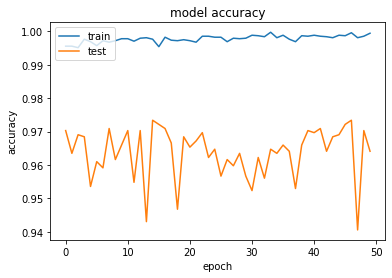

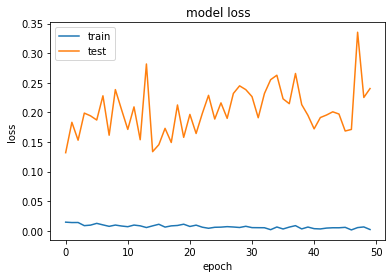

Ende des Versuchs: 


In [125]:

history = model.fit([NewXTraining,NewMRDTraining[:,:5]],
                    NewYTraining,
                    batch_size=100,
                    #validation_split=0.2,
                    
                    validation_data=([NewXVal,NewMRDVal[:,:5]],NewYVal),
                    epochs= 50,
                    
                    shuffle=True,
                    class_weight='balanced',
                    callbacks=[
                                #monitor,
                                #checkpoint,
                                #tensorboard 
                    ],
                    verbose=1)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("Ende des Versuchs: ")

# Test with just feature map

In [56]:
# dense_layers = [3]
# layer_sizes = [160]
# conv_layers = [3]
# kernal_size = [(3,3)]
#Ist schon normalisiert

#NAME ="BigData_Beamlike-32k-toy_res"

#tensorboard = TensorBoard(log_dir = 'logs\{}'.format(NAME))


inputDet = tf.keras.Input(shape=predictionTraining.shape[1:], name='PMT')
inputMRD = tf.keras.Input(shape=(6), name='MRD')


x = layers.Dense(2, activation='sigmoid')(inputDet)
x = layers.Dropout(0.5)(x)
xP =layers.Flatten()(x)



mrd = layers.Dense(6, activation='sigmoid')(inputMRD)
x = layers.Dropout(0.5)(x)
mrd =layers.Flatten()(mrd)

x = layers.concatenate([mrd, xP])
#x = layers.concatenate([xP, mrd])


x= layers.Dense(8, activation='sigmoid')(x)
x= layers.BatchNormalization()(x)
x= layers.Dropout(0.2)(x)

x= layers.Dense(8, activation='sigmoid')(x)
x= layers.BatchNormalization()(x)
x= layers.Dropout(0.2)(x)


x= layers.Dense(6, activation='sigmoid')(x)
x= layers.BatchNormalization()(x)
x= layers.Dropout(0.2)(x)


outputs = layers.Dense(2, activation='softmax')(x)



model = tf.keras.Model(inputs=[inputDet, inputMRD], outputs=[outputs], name='Model')

model.summary()




Model: "Model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
PMT (InputLayer)                [(None, 2)]          0                                            
__________________________________________________________________________________________________
MRD (InputLayer)                [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_84 (Dense)                (None, 2)            6           PMT[0][0]                        
__________________________________________________________________________________________________
dense_85 (Dense)                (None, 6)            42          MRD[0][0]                        
______________________________________________________________________________________________

Train on 85000 samples, validate on 20000 samples
Epoch 1/30
85000/85000 [==============================] - 3s 33us/sample - loss: 0.7029 - acc: 0.5654 - val_loss: 0.7128 - val_acc: 0.5020
Epoch 2/30
85000/85000 [==============================] - 1s 9us/sample - loss: 0.6265 - acc: 0.6126 - val_loss: 0.7097 - val_acc: 0.5020
Epoch 3/30
85000/85000 [==============================] - 1s 10us/sample - loss: 0.5784 - acc: 0.6533 - val_loss: 0.7339 - val_acc: 0.5020
Epoch 4/30
85000/85000 [==============================] - 1s 9us/sample - loss: 0.5314 - acc: 0.7004 - val_loss: 0.8156 - val_acc: 0.5020
Epoch 5/30
85000/85000 [==============================] - 1s 10us/sample - loss: 0.4882 - acc: 0.7363 - val_loss: 0.9815 - val_acc: 0.5020
Epoch 6/30
85000/85000 [==============================] - 1s 10us/sample - loss: 0.4508 - acc: 0.7658 - val_loss: 1.1382 - val_acc: 0.5020
Epoch 7/30
85000/85000 [==============================] - 1s 9us/sample - loss: 0.4244 - acc: 0.7820 - val_loss: 0.921

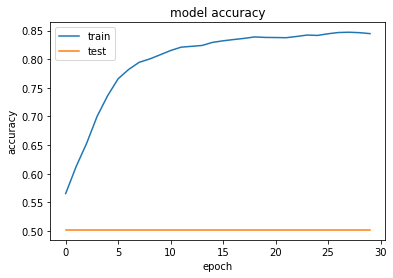

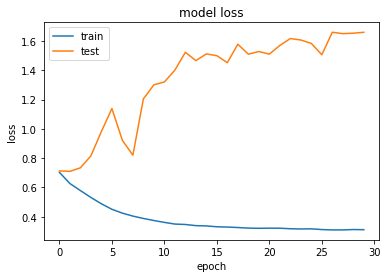

Ende des Versuchs: 


In [57]:


#Model compile
model.compile(
            optimizer='adam',
            #optimizer = keras.optimizers.RMSprop(1e-3),
            loss='categorical_crossentropy',
            metrics=['acc'])


#filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
filepath="PMTOnly_RingCounting-improvement-val-acc_{val_acc:.2f}.model" 
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)


#model Fit

history = model.fit([predictionTraining,XMRDTraing],
                    YTraining,
                    batch_size=1000,
                    #validation_split=0.2,
                    
                    validation_data=([predictionVal,XMRDVal],YVal),
                    epochs= 30,
                    
                    shuffle=True,
                    class_weight='balanced',
                    callbacks=[
                                #monitor,
                                #checkpoint,
                                #tensorboard 
                    ],
                    verbose=1)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("Ende des Versuchs: ")

# Test MRD

In [66]:
# dense_layers = [3]
# layer_sizes = [160]
# conv_layers = [3]
# kernal_size = [(3,3)]
#Ist schon normalisiert

#NAME ="BigData_Beamlike-32k-toy_res"

#tensorboard = TensorBoard(log_dir = 'logs\{}'.format(NAME))



inputMRD = tf.keras.Input(shape=(6), name='MRD')


mrd = layers.Dense(6, activation='sigmoid')(inputMRD)



#x = layers.concatenate([xP, mrd])


outputs = layers.Dense(2, activation='softmax')(mrd)



model = tf.keras.Model(inputs=[inputMRD], outputs=[outputs], name='Model')

model.summary()




Model: "Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
MRD (InputLayer)             [(None, 6)]               0         
_________________________________________________________________
dense_105 (Dense)            (None, 6)                 42        
_________________________________________________________________
dense_106 (Dense)            (None, 2)                 14        
Total params: 56
Trainable params: 56
Non-trainable params: 0
_________________________________________________________________


In [61]:
XMRDTraing.shape,XMRDVal.shape

((85000, 6), (20000, 6))

Train on 85000 samples, validate on 20000 samples
Epoch 1/30
85000/85000 [==============================] - 2s 24us/sample - loss: 0.7099 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.4980
Epoch 2/30
85000/85000 [==============================] - 0s 4us/sample - loss: 0.6932 - acc: 0.4972 - val_loss: 0.6932 - val_acc: 0.4980
Epoch 3/30
85000/85000 [==============================] - 0s 4us/sample - loss: 0.6932 - acc: 0.5017 - val_loss: 0.6932 - val_acc: 0.5020
Epoch 4/30
85000/85000 [==============================] - 0s 4us/sample - loss: 0.6932 - acc: 0.4973 - val_loss: 0.6931 - val_acc: 0.4980
Epoch 5/30
85000/85000 [==============================] - 0s 4us/sample - loss: 0.6932 - acc: 0.4983 - val_loss: 0.6931 - val_acc: 0.5020
Epoch 6/30
85000/85000 [==============================] - 0s 4us/sample - loss: 0.6932 - acc: 0.5012 - val_loss: 0.6931 - val_acc: 0.5020
Epoch 7/30
85000/85000 [==============================] - 0s 4us/sample - loss: 0.6932 - acc: 0.5001 - val_loss: 0.6933 -

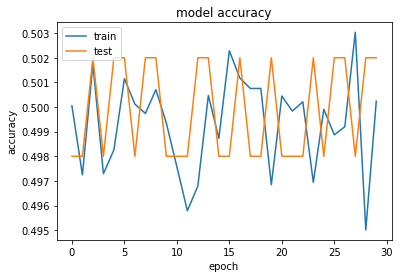

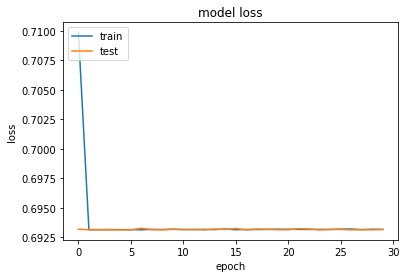

Ende des Versuchs: 


In [67]:


#Model compile
model.compile(
            optimizer='adam',
            #optimizer = keras.optimizers.RMSprop(1e-3),
            loss='categorical_crossentropy',
            metrics=['acc'])


#filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
filepath="PMTOnly_RingCounting-improvement-val-acc_{val_acc:.2f}.model" 
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)


#model Fit

history = model.fit(XMRDTraing,
                    YTraining,
                    batch_size=1000,
                    #validation_split=0.2,
                    
                    validation_data=(XMRDVal,YVal),
                    epochs= 30,
                    
                    shuffle=True,
                    class_weight='balanced',
                    callbacks=[
                                #monitor,
                                #checkpoint,
                                #tensorboard 
                    ],
                    verbose=1)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("Ende des Versuchs: ")

# Ende

In [ ]:
dense_layers = [3]
layer_sizes = [160]
conv_layers = [3]
kernal_size = [(3,3)]
for filter_size in kernal_size:
    for dense_layer in dense_layers:
        for layer_size in layer_sizes:
            for conv_layer in conv_layers:

                NAME ="PMT-MuEl-{}-filter_size-{}-conv-{}-nodes-{}-dense".format(filter_size,conv_layer, layer_size, dense_layer) #,int(time.time())
                tensorboard = TensorBoard(log_dir = 'logs\PMTplusLAPPD_CNN\{}'.format(NAME))


                model = Sequential()
                model.add(Conv2D(layer_size,filter_size,strides=1, input_shape= XTraining.shape[1:],activation="relu", padding='same'))                                               
                model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                for l in range(conv_layer-1):                   
                    model.add(Conv2D(layer_size,filter_size,padding='same',activation="relu"))              
                    model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))            
                #model.add(GlobalAveragePooling2D())
                model.add(Flatten())
                for l in range(dense_layer-1):
                    model.add(Dense(512-l*20 ,activation="relu" ))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))
                model.add(Dense(32,activation="relu"))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                model.add(Dense(2))
                model.add(Activation('softmax'))
                #adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, epsilon = 0.001)
                model.compile(loss="binary_crossentropy",
                             optimizer="adam",
                              metrics=['accuracy']
                             )   
                filepath="CNN_InputModel-improvement-val-acc_{val_acc:.2f}.model"  
                checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
                #monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
                model.summary()
                history=model.fit(
                    
                    XTraining,YTraining,
              #validation_data=(XVal,Yval)
                 validation_data=(XVal,YVal)   
                    
              ,batch_size=100,
                shuffle=True,
                class_weight='balanced',
                callbacks=[
                            #monitor,
                            checkpoint,
                            #tensorboard 
                ],
              epochs= 38)
                print(history.history.keys())
                # summarize history for accuracy
                plt.plot(history.history['acc'])
                plt.plot(history.history['val_acc'])
                plt.title('model accuracy')
                plt.ylabel('accuracy')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()
                # summarize history for loss
                plt.plot(history.history['loss'])
                plt.plot(history.history['val_loss'])
                plt.title('model loss')
                plt.ylabel('loss')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()

                print("Ende des Versuchs: ")
            

In [47]:
predictionTraining = model.predict(XTraining)
predictionVal = model.predict(XVal)
predictionTest = model.predict(XTest)

# Evaluate

In [46]:
model = tf.keras.models.load_model("CNN_InputModel-improvement-val-acc_0.94.model")

W0602 18:26:49.188539  8156 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0602 18:26:49.188539  8156 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0602 18:26:49.204197  8156 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_6

In [24]:
score = model.evaluate(XTest, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.16184363836290358
Test accuracy:  0.9361546


In [25]:


rounded_labels =np.argmax(YTest, axis=1)
y_prob = np.array(model.predict(XTest, batch_size=128, verbose=0))
y_classes = y_prob.argmax(axis=-1)
cm = confusion_matrix(rounded_labels, y_classes)
print(cm)


[[6794  606]
 [ 352 7253]]


In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[0.91810811 0.08189189]
 [0.04628534 0.95371466]]


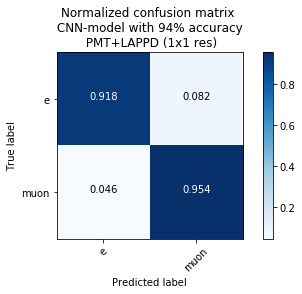

In [28]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = ["e", "muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n CNN-model with 94% accuracy \n PMT+LAPPD (1x1 res)')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

# Does Charge learn better than Charge+Time?

In [21]:
XTrainingT= XTraining[:,:,:,1].reshape(XTraining.shape[0],XTraining.shape[1],XTraining.shape[2],1)
XTestT = XTest[:,:,:,1].reshape(XTest.shape[0],XTest.shape[1],XTest.shape[2],1)
XValT = XVal[:,:,:,1].reshape(XVal.shape[0],XVal.shape[1],XVal.shape[2],1)

XTrainingC= XTraining[:,:,:,0].reshape(XTraining.shape[0],XTraining.shape[1],XTraining.shape[2],1)
XTestC = XTest[:,:,:,0].reshape(XTest.shape[0],XTest.shape[1],XTest.shape[2],1)
XValC = XVal[:,:,:,0].reshape(XVal.shape[0],XVal.shape[1],XVal.shape[2],1)

Model: "sequential_113"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_339 (Conv2D)          (None, 10, 24, 160)       1600      
_________________________________________________________________
max_pooling2d_339 (MaxPoolin (None, 5, 12, 160)        0         
_________________________________________________________________
batch_normalization_562 (Bat (None, 5, 12, 160)        640       
_________________________________________________________________
dropout_562 (Dropout)        (None, 5, 12, 160)        0         
_________________________________________________________________
conv2d_340 (Conv2D)          (None, 5, 12, 160)        230560    
_________________________________________________________________
max_pooling2d_340 (MaxPoolin (None, 3, 6, 160)         0         
_________________________________________________________________
batch_normalization_563 (Bat (None, 3, 6, 160)      

Epoch 16/38
84900/85000 [============================>.] - ETA: 0s - loss: 0.1461 - acc: 0.9408
Epoch 00016: val_acc did not improve from 0.92680
85000/85000 [==============================] - 25s 300us/sample - loss: 0.1461 - acc: 0.9408 - val_loss: 0.2501 - val_acc: 0.8924
Epoch 17/38
84900/85000 [============================>.] - ETA: 0s - loss: 0.1418 - acc: 0.9414
Epoch 00017: val_acc did not improve from 0.92680
85000/85000 [==============================] - 25s 299us/sample - loss: 0.1417 - acc: 0.9415 - val_loss: 0.2068 - val_acc: 0.9194
Epoch 18/38
84800/85000 [============================>.] - ETA: 0s - loss: 0.1374 - acc: 0.9437
Epoch 00018: val_acc did not improve from 0.92680
85000/85000 [==============================] - 25s 296us/sample - loss: 0.1375 - acc: 0.9437 - val_loss: 0.2242 - val_acc: 0.9023
Epoch 19/38
84900/85000 [============================>.] - ETA: 0s - loss: 0.1351 - acc: 0.9445
Epoch 00019: val_acc did not improve from 0.92680
85000/85000 [=============

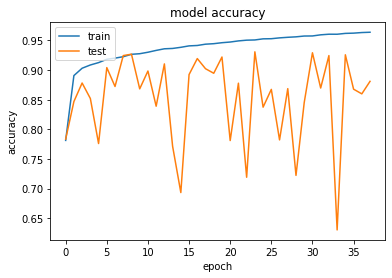

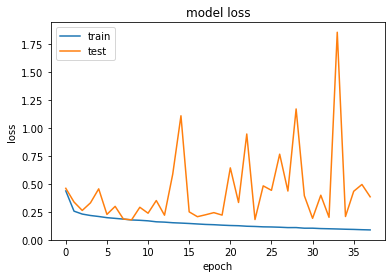

Ende des Versuchs: 


In [22]:
dense_layers = [3]
layer_sizes = [160]
conv_layers = [3]
kernal_size = [(3,3)]
for filter_size in kernal_size:
    for dense_layer in dense_layers:
        for layer_size in layer_sizes:
            for conv_layer in conv_layers:

                NAME ="PMT-MuEl-{}-filter_size-{}-conv-{}-nodes-{}-dense".format(filter_size,conv_layer, layer_size, dense_layer) #,int(time.time())
                tensorboard = TensorBoard(log_dir = 'logs\PMTplusLAPPD_CNN\{}'.format(NAME))


                model = Sequential()
                model.add(Conv2D(layer_size,filter_size,strides=1, input_shape= XTrainingC.shape[1:],activation="relu", padding='same'))                                               
                model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                for l in range(conv_layer-1):                   
                    model.add(Conv2D(layer_size,filter_size,padding='same',activation="relu"))              
                    model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))            
                #model.add(GlobalAveragePooling2D())
                model.add(Flatten())
                for l in range(dense_layer-1):
                    model.add(Dense(512-l*20 ,activation="relu" ))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))
                model.add(Dense(32,activation="relu"))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                model.add(Dense(2))
                model.add(Activation('softmax'))
                #adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, epsilon = 0.001)
                model.compile(loss="binary_crossentropy",
                             optimizer="adam",
                              metrics=['accuracy']
                             )   
                filepath="CNN_Charge_PMT+LAPPD(1x1)_PID_120k_V3-improvement-val-acc_{val_acc:.2f}.model"  
                checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
                #monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
                model.summary()
                history=model.fit(
                    
                    XTrainingC,YTraining,
              #validation_data=(XVal,Yval)
                 validation_data=(XValC,Yval)   
                    
              ,batch_size=100,
                shuffle=True,
                class_weight='balanced',
                callbacks=[
                            #monitor,
                            checkpoint,
                            #tensorboard 
                ],
              epochs= 38)
                print(history.history.keys())
                # summarize history for accuracy
                plt.plot(history.history['acc'])
                plt.plot(history.history['val_acc'])
                plt.title('model accuracy')
                plt.ylabel('accuracy')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()
                # summarize history for loss
                plt.plot(history.history['loss'])
                plt.plot(history.history['val_loss'])
                plt.title('model loss')
                plt.ylabel('loss')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()

                print("Ende des Versuchs: ")
            

# Tensorboard

cd "Documents\Python\CNN_Masterarbeit"

tensorboard --logdir=logs/ --host localhost --port 8088

tensorboard --logdir=logs/Overfitting_Studie --host localhost --port 8088

tensorboard --logdir=logs/Modell_Studie --host localhost --port 8088

# Evaluate

In [72]:
model = tf.keras.models.load_model("PMTOnly_PI_22k_RANDOM-improvement-val-acc_0.93.model")

(4552, 10, 16, 2)

In [74]:

print(XTest.shape,YTest.shape)
for sample in YTest[:20]:
    print(sample)

(4052, 10, 16, 2) (4052, 2)
[1 0]
[0 1]
[1 0]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[1 0]
[0 1]
[0 1]
[1 0]
[0 1]
[1 0]
[1 0]
[1 0]
[1 0]


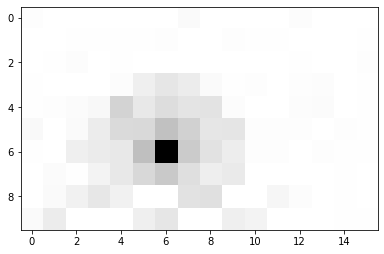

In [75]:
plt.imshow(XTest[7,:,:,0], cmap='binary', interpolation='None')

In [76]:
score = model.evaluate(XTest, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.2208471007696615
Test accuracy:  0.9163376


# Confusion matrix


In [77]:

prediction = model.predict(XTest)
print(prediction.shape,YTest.shape)
rounded_labels =np.argmax(YTest, axis=1)
y_prob = np.array(model.predict(XTest, batch_size=128, verbose=0))
y_classes = y_prob.argmax(axis=-1)
cm = confusion_matrix(rounded_labels, y_classes)
print(cm)


(4052, 2) (4052, 2)
[[1900  185]
 [ 154 1813]]


In [48]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[0.91127098 0.08872902]
 [0.07829181 0.92170819]]


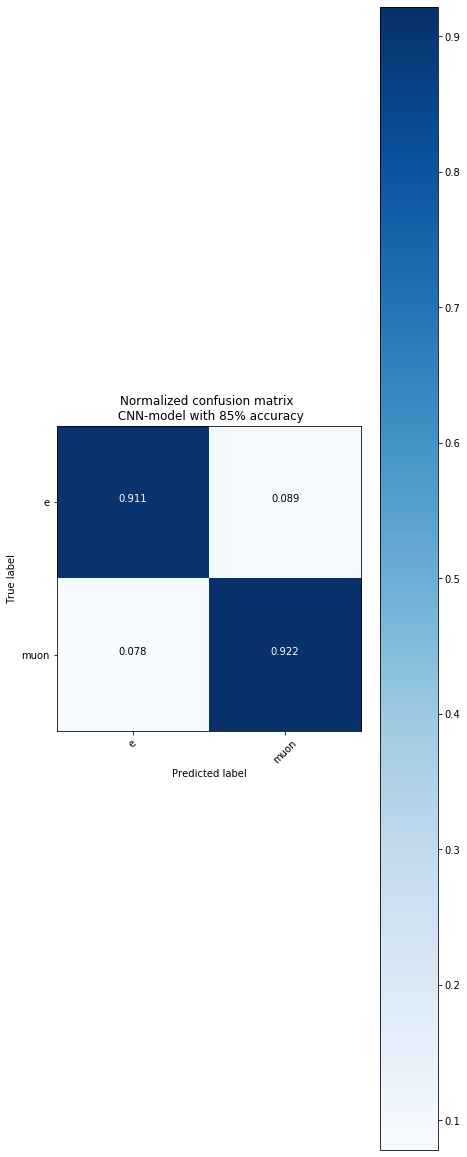

In [79]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = ["e", "muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n CNN-model with 85% accuracy')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

In [50]:
from tensorflow import keras
import pydot_ng as pydot
from keras.utils.vis_utils import model_to_dot
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

Using TensorFlow backend.


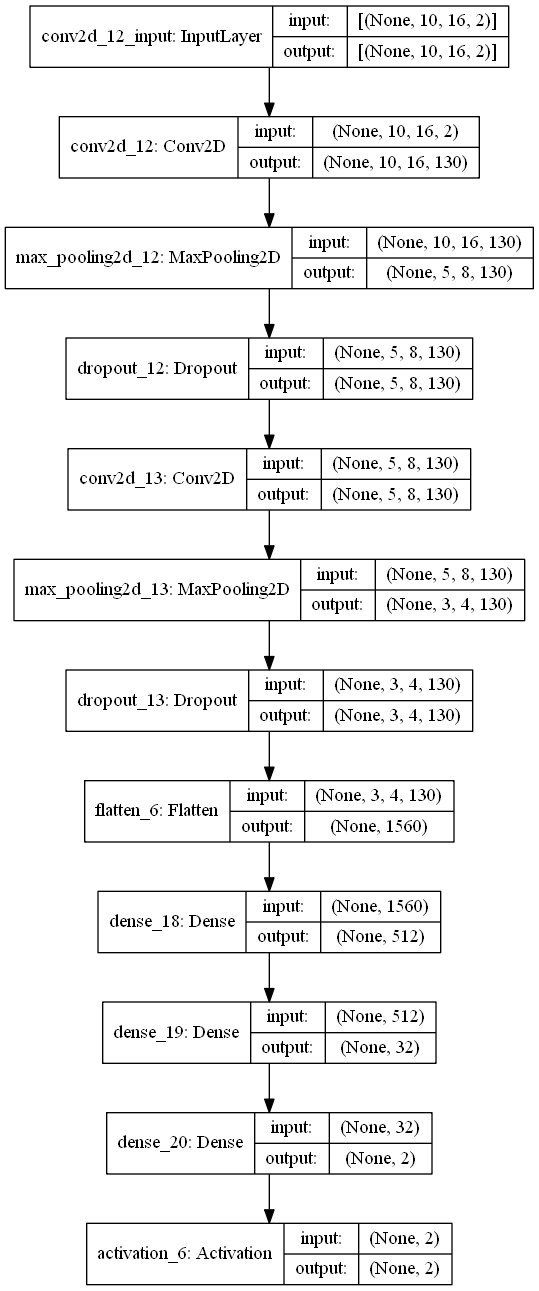

In [51]:
keras.utils.plot_model(model, 'my_first_model_with_shape_info.png', show_shapes=True)

In [53]:
from matplotlib import pyplot

conv2d_12 (5, 5, 2, 130)


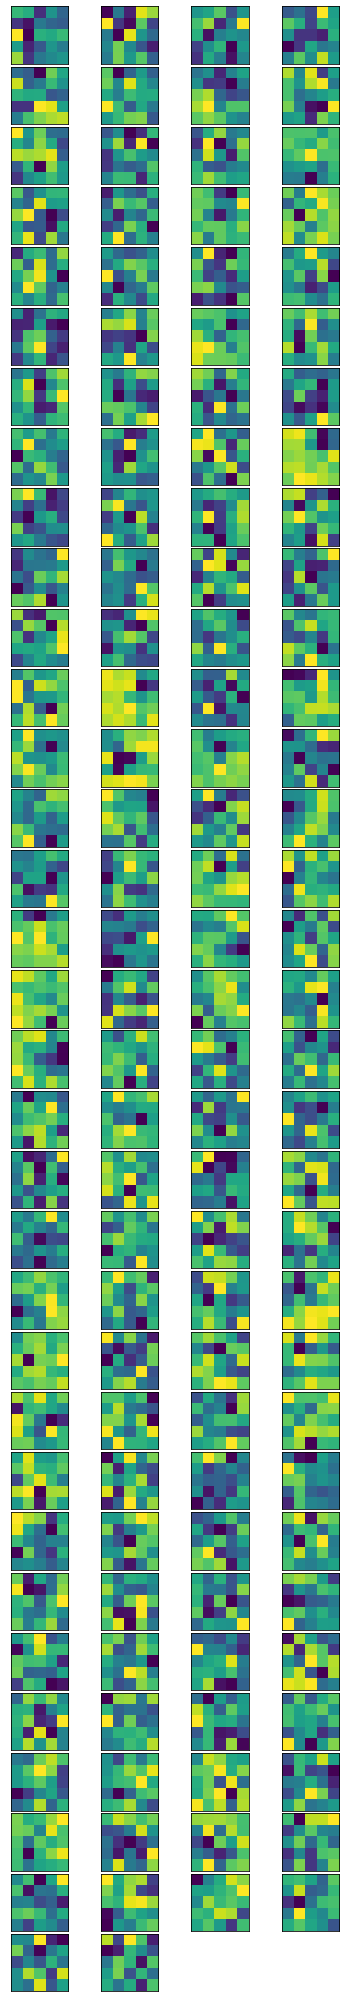

In [56]:
#summarize filter shapes
pyplot.subplots_adjust(wspace = 0.05 ,hspace = 0.05)
for layer in model.layers:
    #check for conv. layer
    if 'conv' not in layer.name:
        continue
    #get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)
    f_min, f_max= filters.min(),filters.max()
    filters = (filters-f_min)/(f_max-f_min)
    # plot first few filters
    

    n_filters, ix = 130, 1


    for i in range(n_filters):
        #get the filter
        f = filters[:, :, :, i]
        # plot each channel separately

      


        ax = pyplot.subplot(n_filters, 4, ix)
        
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(f[:,:, 1], cmap='viridis')
        ix += 1
    # show the figure
    #pyplot.savefig("PMT Model 85% layer0 ALL ConvFilters-Time.jpg",format ="jpg", bbox_inches='tight')
    pyplot.show()
    
    break

In [120]:
for j in range(1):
    print(j)

0


In [55]:
plt.rcParams['figure.figsize'] = [6.4, 30*4.8]

In [57]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    print(i, layer.name, layer.output.shape)

0 conv2d_12 (?, 10, 16, 130)
3 conv2d_13 (?, 5, 8, 130)


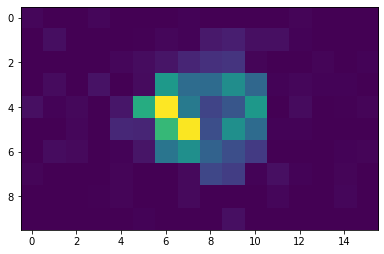

In [58]:
plt.imshow(X[9,:,:,0], cmap='viridis', interpolation='None')

In [86]:
plt.rcParams['figure.figsize'] = [6.4, 10*4.8]

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14_input (InputLayer) [(None, 10, 16, 2)]       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 10, 16, 130)       6630      
Total params: 6,630
Trainable params: 6,630
Non-trainable params: 0
_________________________________________________________________
(1, 10, 16, 130)


ValueError: num must be 1 <= num <= 52, not 53

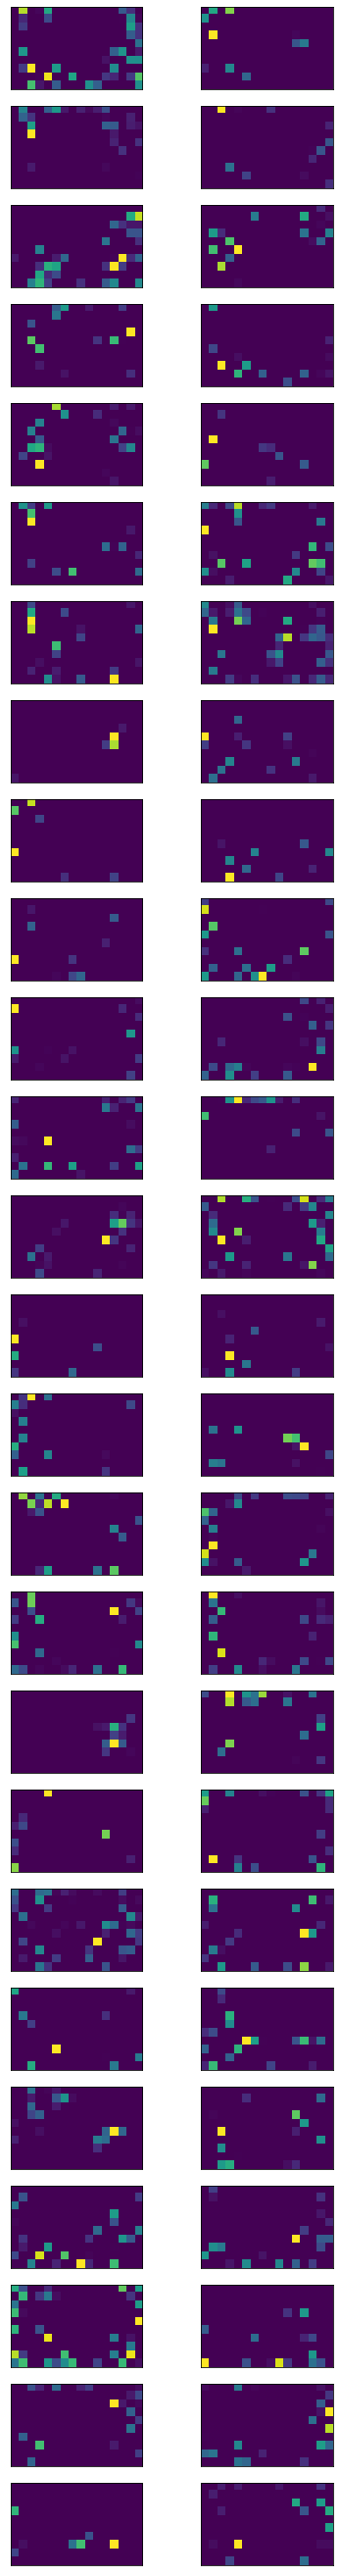

In [89]:
model = tf.keras.models.load_model("PMTOnly_PI_22k_RANDOM-improvement-val-acc_0.93.model")

from tensorflow.keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims



ixs = [0]

outputs = [model.layers[i].output for i in ixs]



model = Model(inputs=model.inputs, outputs=model.layers[0].output)

model.summary()





# get feature map for first hidden layer
feature_maps = model.predict(XTest[9:10])
print(feature_maps.shape)
# plot all 64 maps in an 8x8 squares

#for fmap in feature_maps:
ix = 1
a=130
for _ in range(a):
    for _ in range(a):
        if ix==a+1:
            break
        # specify subplot and turn of axis
        ax = pyplot.subplot(26, 2, ix)
        ax.set_xticks([])
        ax.set_yticks([])

        # plot filter channel in grayscale
        pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='viridis')
        ix += 1
    # show the figure
#pyplot.savefig("PMT layer0 ALL Conv ElectronEvent9.jpg",format ="jpg", bbox_inches='tight')
pyplot.show()
